![wg_pct.png](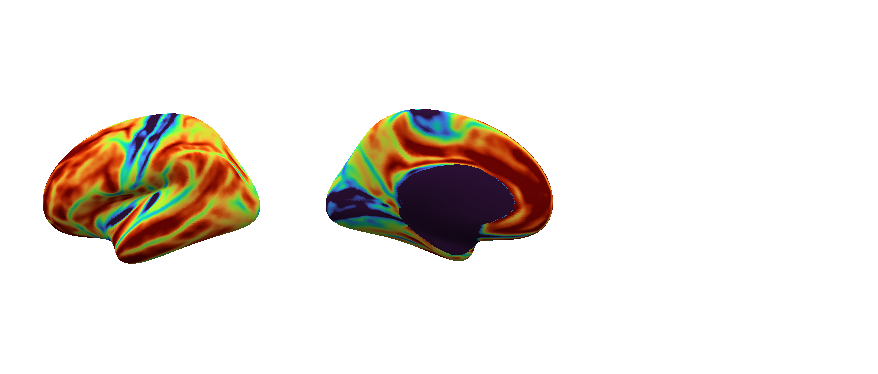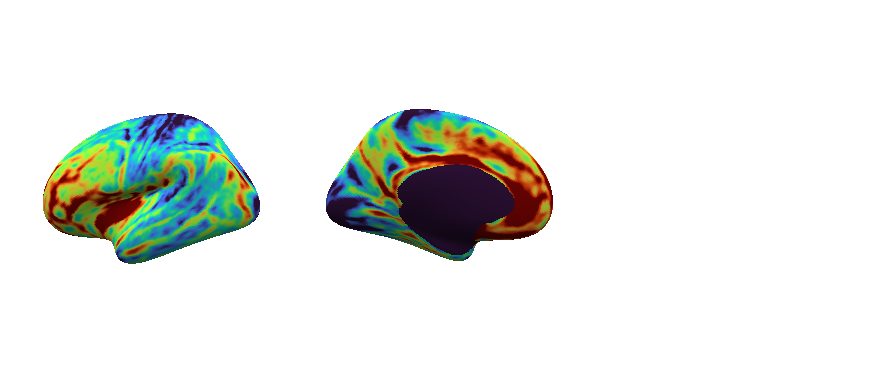)#Welcome to the interactive MELD workshop

Installing dependencies, github repo and data.

In [ ]:
#Installing and downloading
!pip install nibabel
!rm -r meld_workshop
!git clone https://www.github.com/MELDproject/meld_workshop
!pip install matplotlib-surface-plotting
!pip install ipywidgets
#importing packages
import matplotlib_surface_plotting as msp
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nb
from ipywidgets import interact, IntSlider



#Load in the T1 and FLAIR MRIs for a patient with FCD

In [58]:
subject='sub_00'

t1 = nb.load(f'./meld_workshop/data/{subject}/mri/T1.mgz')
flair = nb.load(f'./meld_workshop/data/{subject}/mri/FLAIR.mgz')
t1_data=t1.get_fdata()
flair_data=flair.get_fdata()

Scroll through the MRIs and try to find the lesion.

In [36]:
#define a MRI viewing function
def plot_slice(slice_index):
    """
    Plot a slice from T1-weighted and FLAIR MRI data.

    Parameters:
    slice_index (int): The index of the slice to be plotted.
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    axes[0].imshow(t1_data[:, :, slice_index].T, cmap='gray',vmin=50,vmax=120)
    axes[0].set_title(f'T1 - Slice {slice_index}')
    axes[0].axis('off')

    axes[1].imshow(flair_data[:, :, slice_index].T, cmap='gray',vmin=20,vmax=180)
    axes[1].set_title(f'FLAIR - Slice {slice_index}')
    axes[1].axis('off')

    plt.show()

# Create an interactive slider
slice_slider = IntSlider(min=0, max=t1_data.shape[2]-1, step=1, value=t1_data.shape[2]//2)

# Use the interact function to update the MRI plot with the slider
interact(plot_slice, slice_index=slice_slider)

#scroll through the MRI to try to find the lesion

interactive(children=(IntSlider(value=128, description='slice_index', max=255), Output()), _dom_classes=('widg…

<function __main__.plot_slice(slice_index)>

#Q1. How confident are you about the lesion location?

1.   Absolutely no idea
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   100% Confident



#Let's load and view surface based features

In [63]:
#here we've selected 5 key features to view on the surface
features = ['thickness','w-g.pct','gm_FLAIR_0.5','wm_FLAIR_0.5','pial.K_filtered.sm20']

In [64]:
#choose a hemisphere to look at
hemi='rh'

#all data is mapped to the left hemisphere of fsaverage_sym.
#lh.pial and lh.white surfaces are also provided.
surf = nb.freesurfer.read_geometry('./meld_workshop/data/fsaverage_sym/surf/lh.inflated')


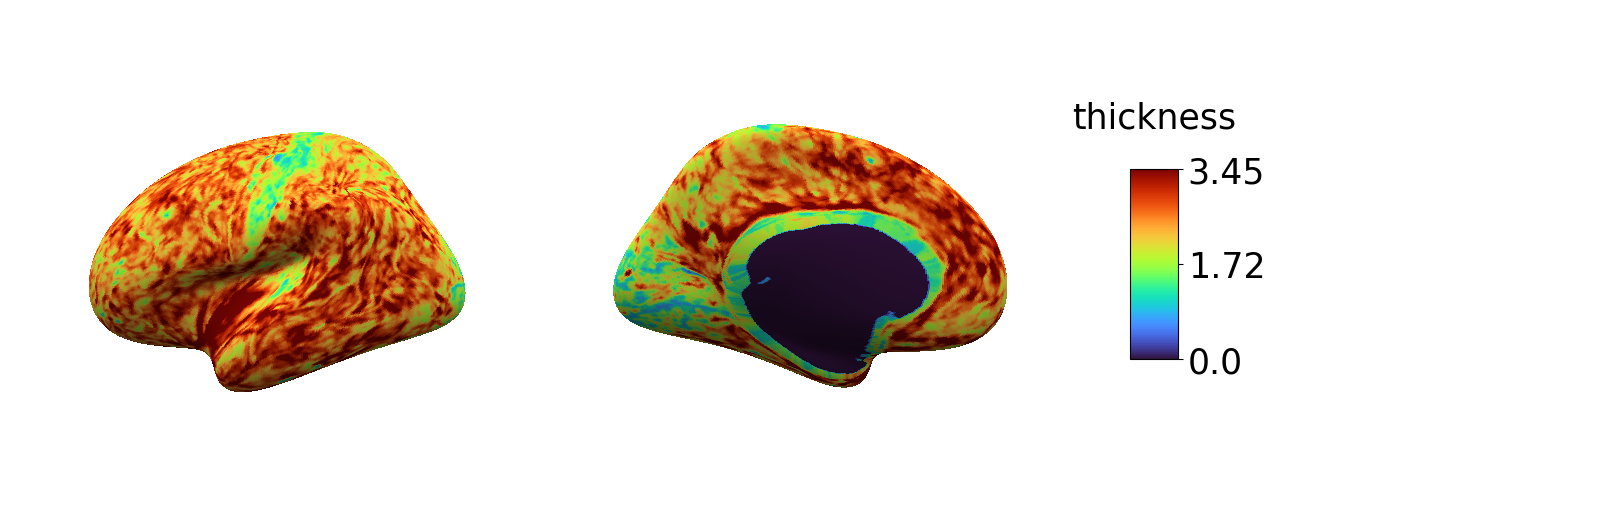

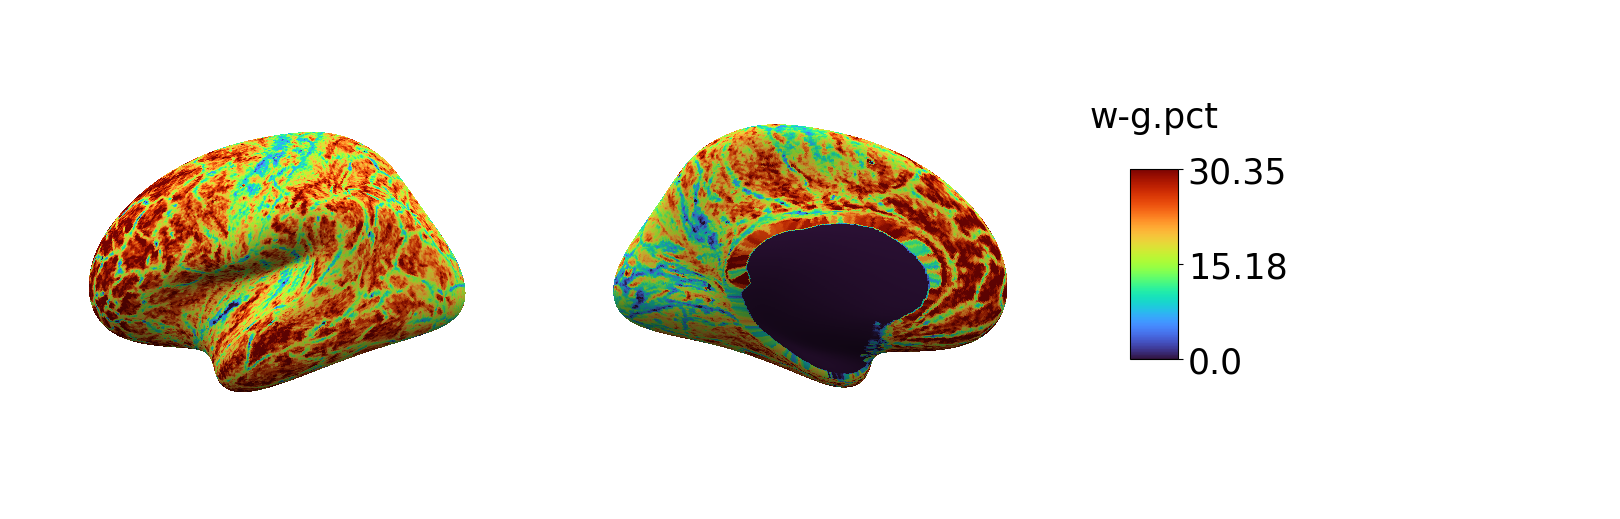

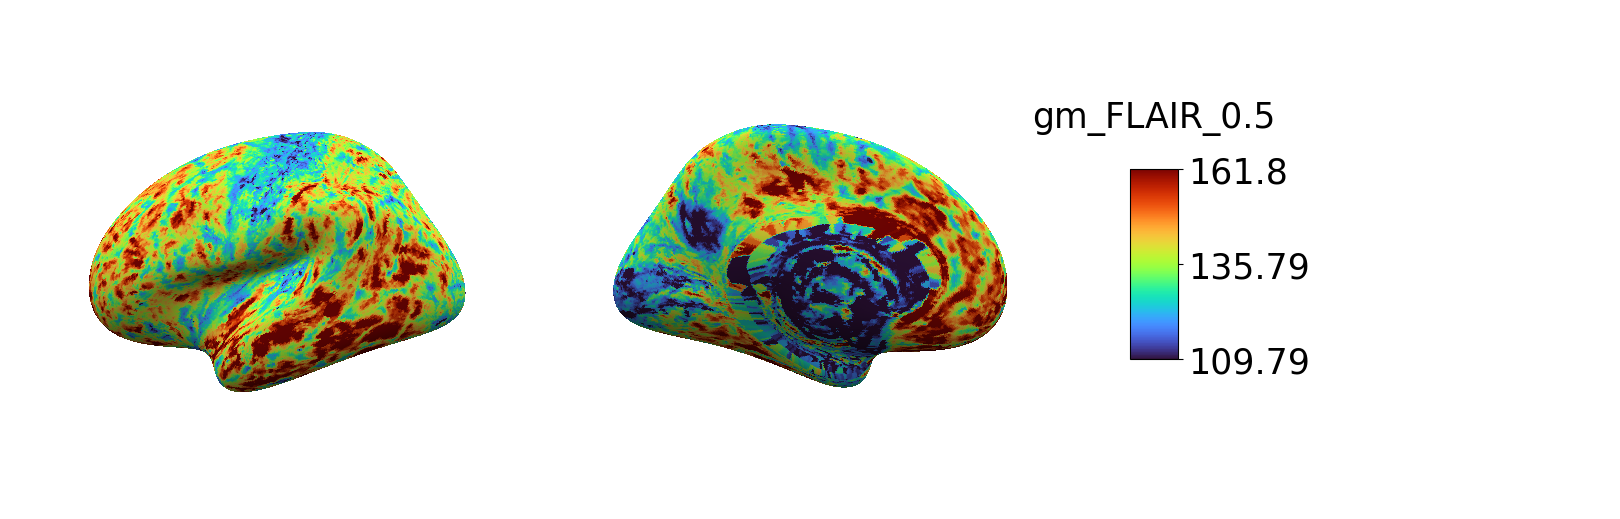

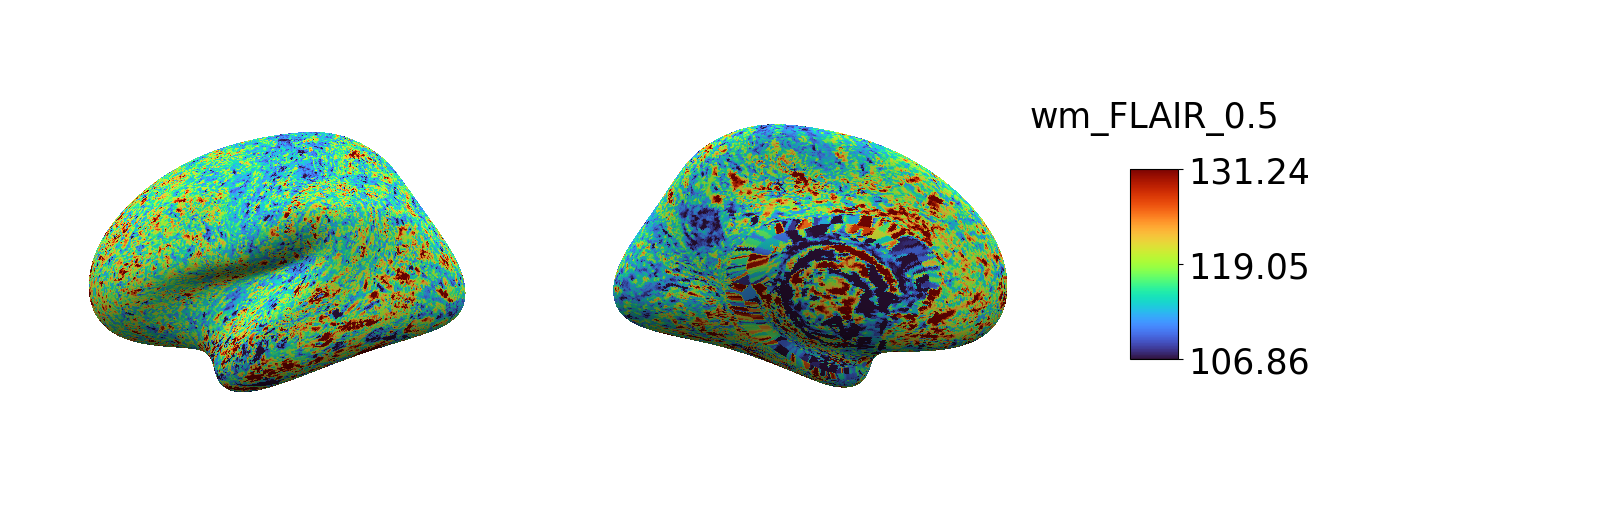

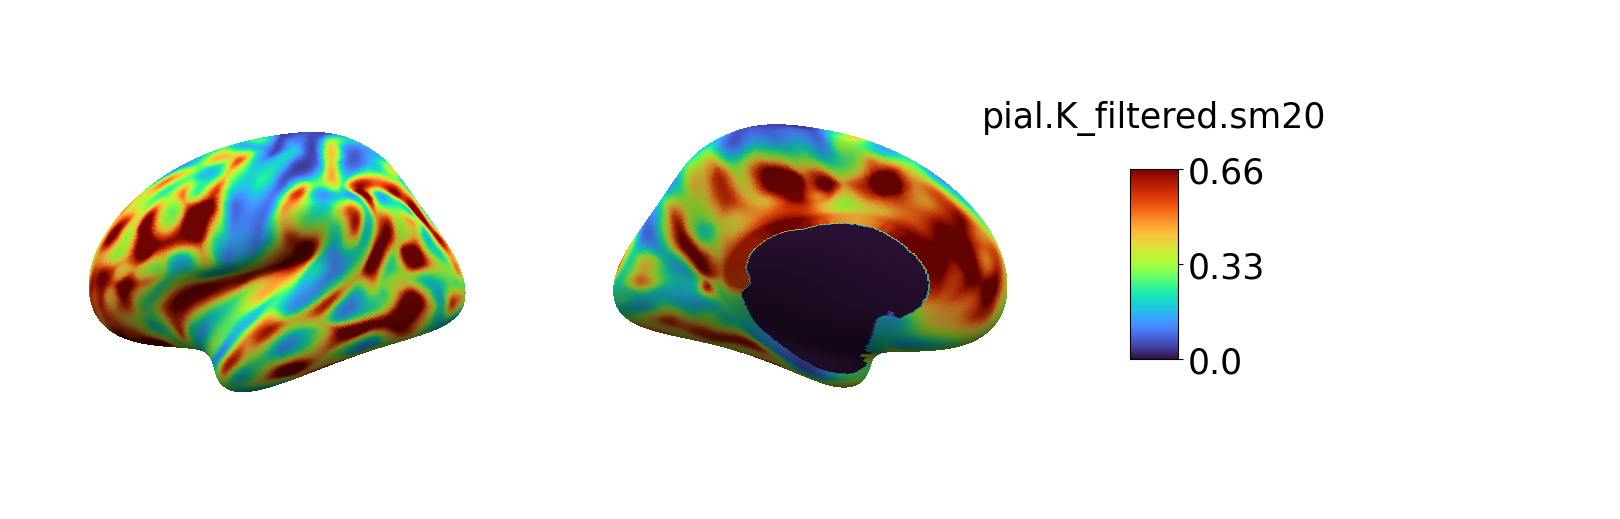

In [65]:
#load in just the "raw" features on to the cortical surface
surf_folder = f'./meld_workshop/data/{subject}/xhemi/surf_meld'
#loop over the feature names
for feat_i in features:
  feat = '{}.on_lh.{}.mgh'.format(hemi,feat_i)
  #load in the feature using nibabel
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()
  #plot using a matplotlib_surface_plotting
  msp.plot_surf(surf[0],surf[1],
                feature,vmin=np.percentile(feature,5),cmap_label=feat_i,
                vmax = np.percentile(feature,95),cmap='turbo')

#Do any of these features look abnormal?

#Q2. How confident are you about the lesion location now?

1.   Absolutely no idea
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   100% Confident

Two challenges in identifying abnormal feature values are interregional and intersubject variability.



#Intra & intersubject normalisation



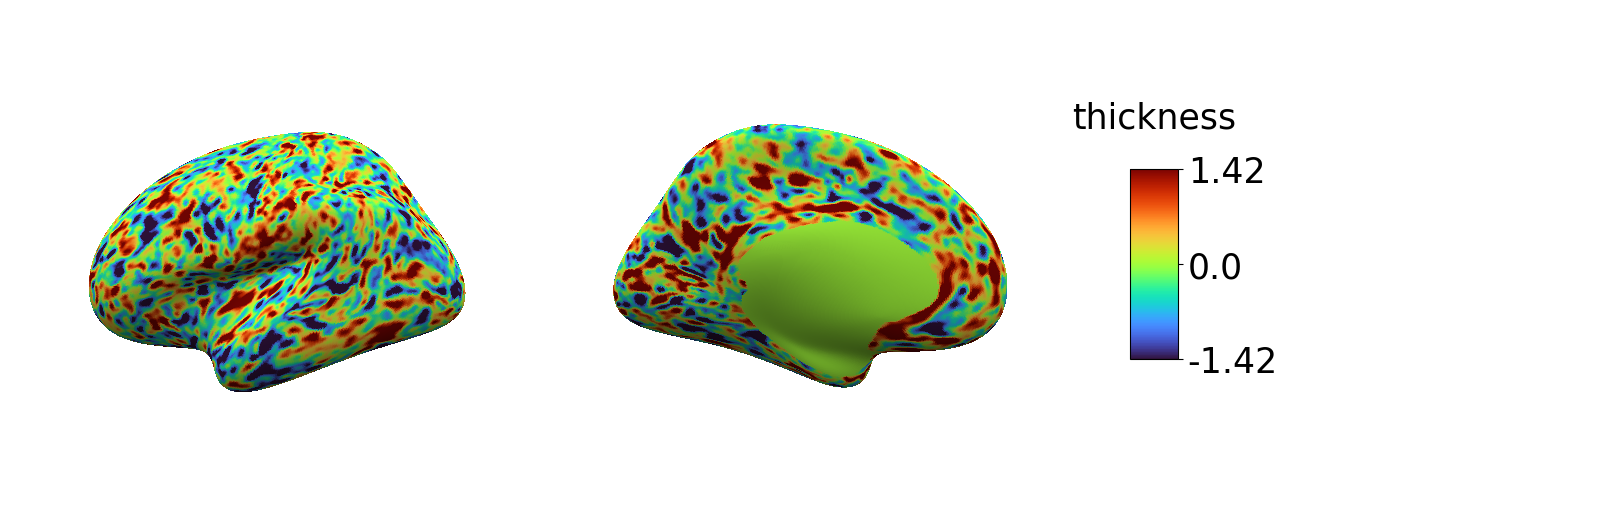

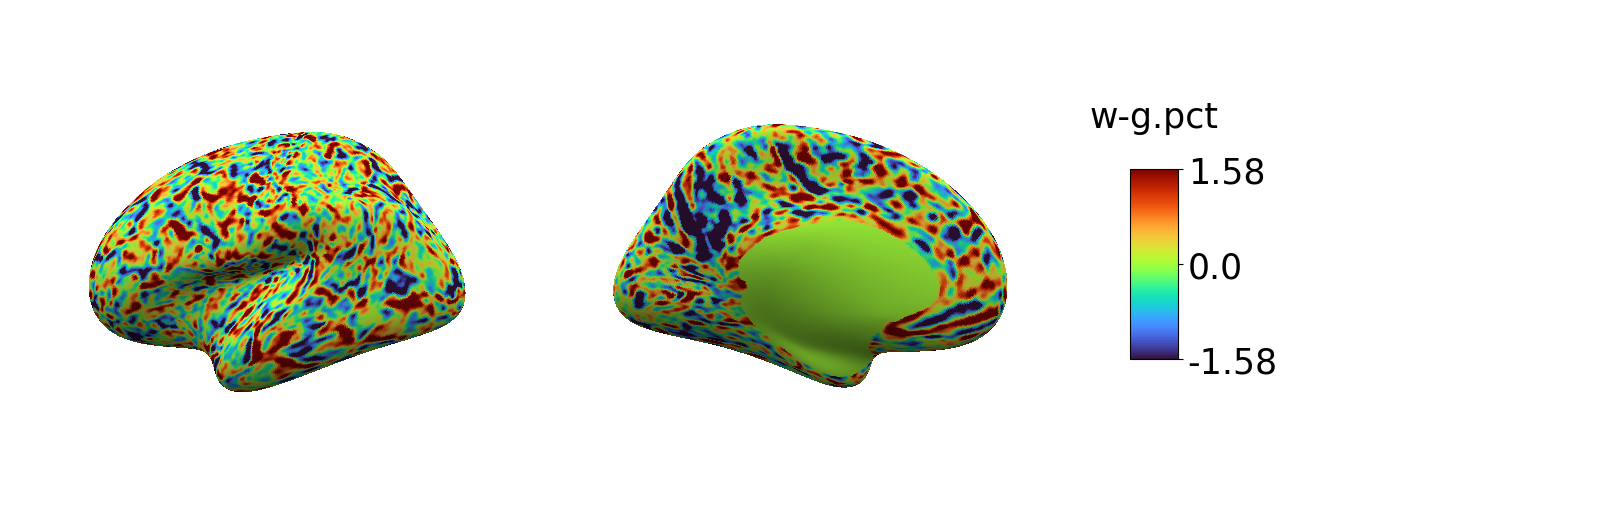

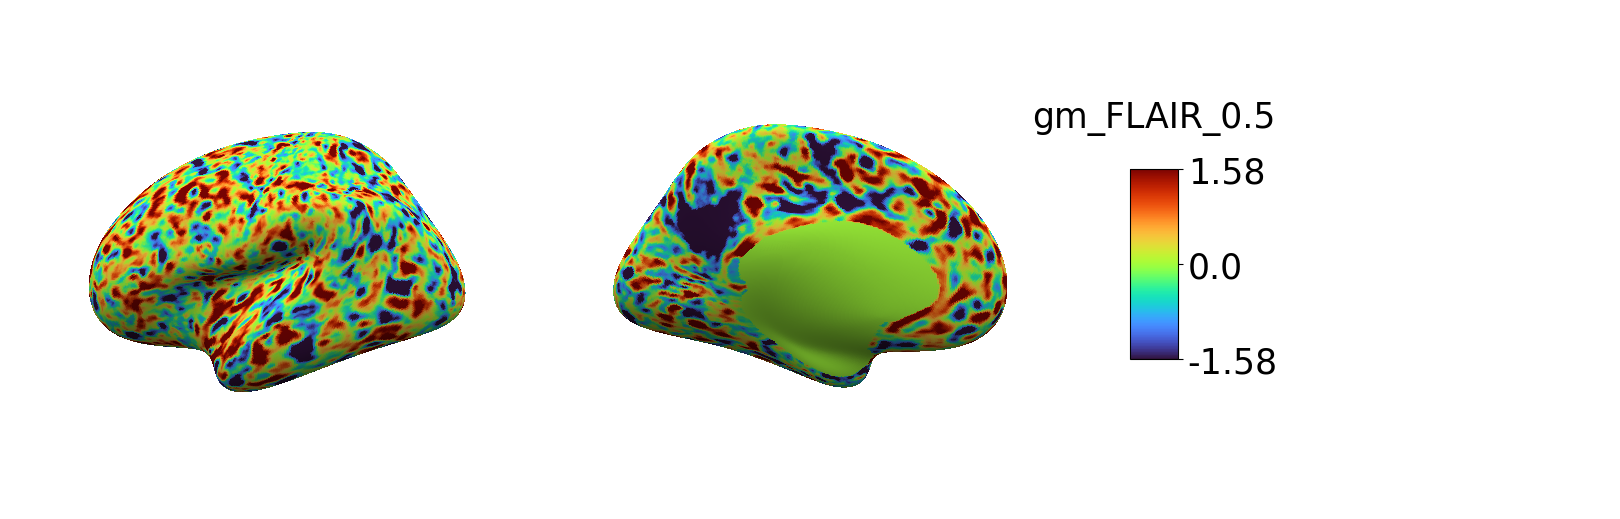

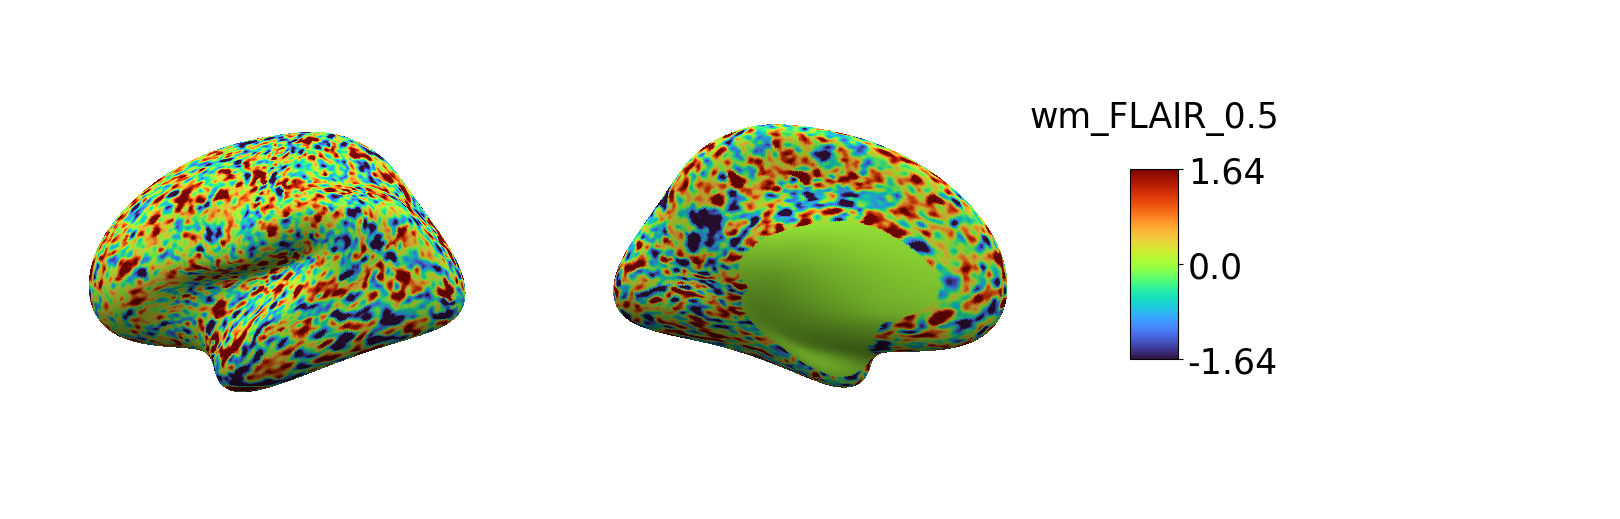

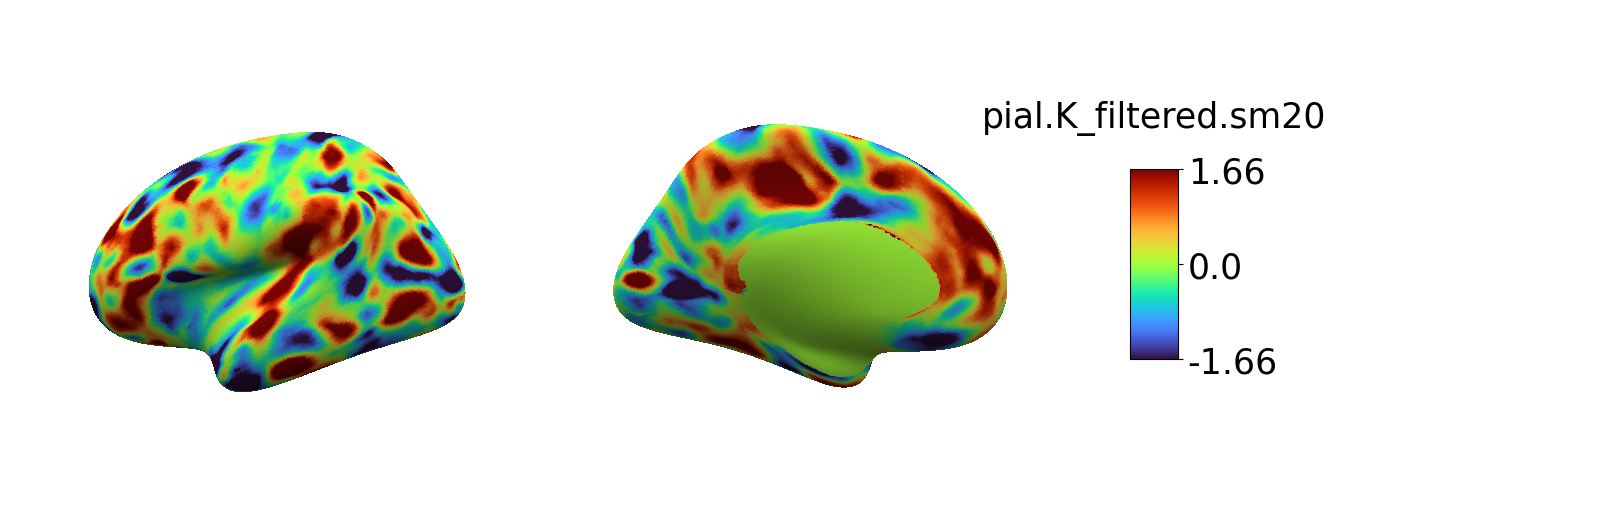

In [66]:
#You can
feature_type =  '.inter_z.asym.intra_z.'
for feat_i in features:
  if 'pial' in feat_i:
      feat = f'{hemi}{feature_type}combat.on_lh.{feat_i}.mgh'
  else:
      feat = f'{hemi}{feature_type}combat.on_lh.{feat_i}.sm3.mgh'
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()

  msp.plot_surf(surf[0],surf[1],
                feature,vmin=-np.percentile(feature,95),cmap_label=feat_i,
                vmax = np.percentile(feature,95),cmap='turbo')

#Q3. How confident are you about the lesion location after post-processing features?

1.   Absolutely no idea
2.   Everything looks a bit abnormal
3.   One or two areas look suspicious
4.   I think I know where it is
5.   100% Confident

In [67]:
#Normalised features input into graph neural network algorithm.
#Produces predictions on surface

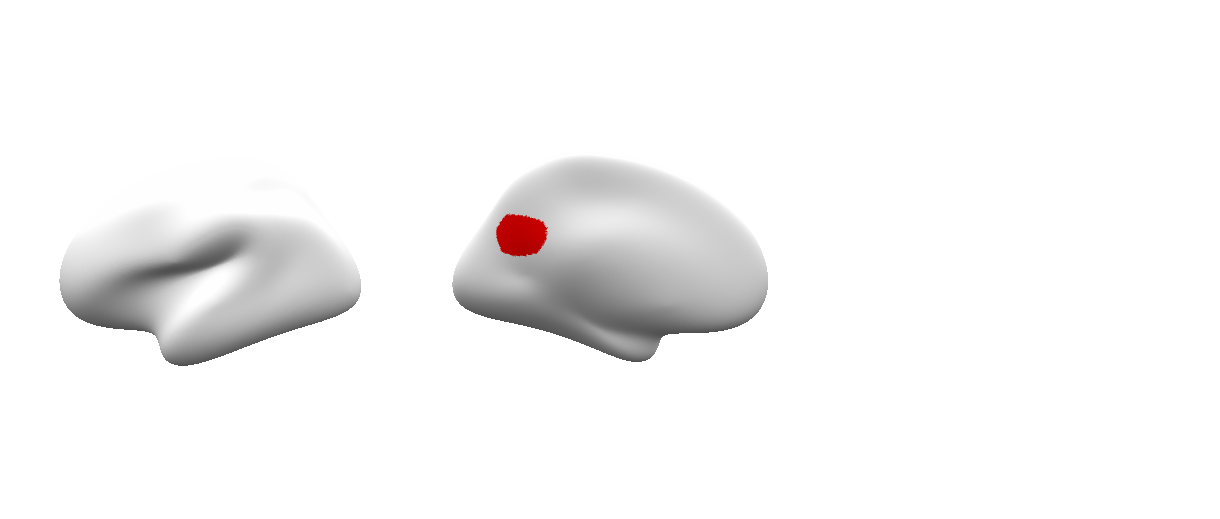

In [68]:
prediction = nb.load(os.path.join(surf_folder,
                    f'{hemi}.on_lh.prediction.mgh')).get_fdata().ravel()

msp.plot_surf(surf[0],surf[1],
                prediction,cmap='bwr',vmin=-1,vmax=1,colorbar=False)

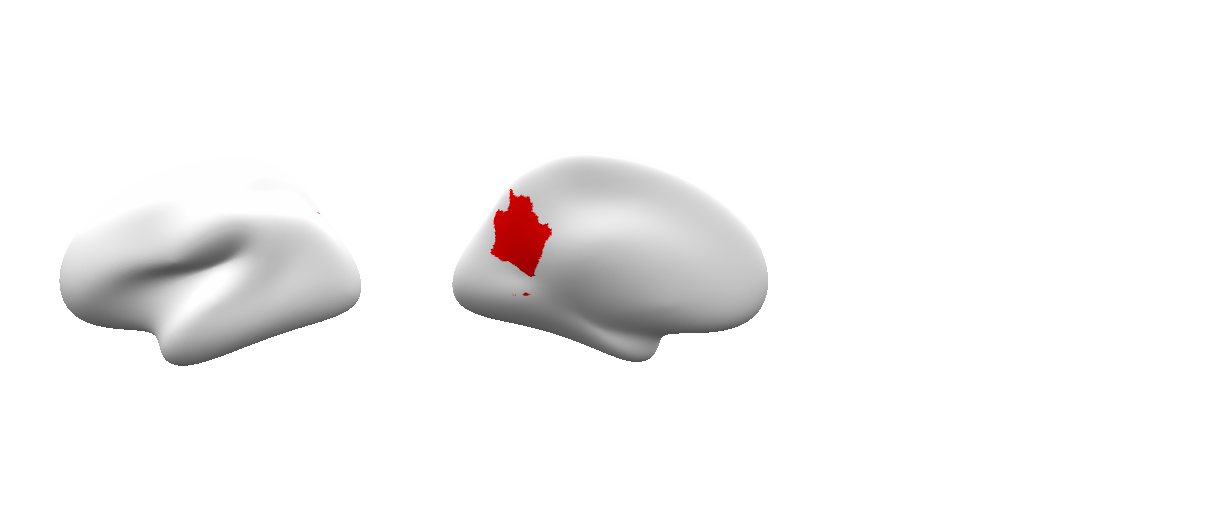

In [45]:
lesion_mask = nb.load(os.path.join(surf_folder,
                    f'{hemi}.on_lh.lesion_mask.mgh')).get_fdata().ravel()

msp.plot_surf(surf[0],surf[1],
                lesion_mask,cmap='bwr',vmin=-1,vmax=1,colorbar=False)